In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student-mat.csv', delimiter=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<function matplotlib.pyplot.show(*args, **kw)>

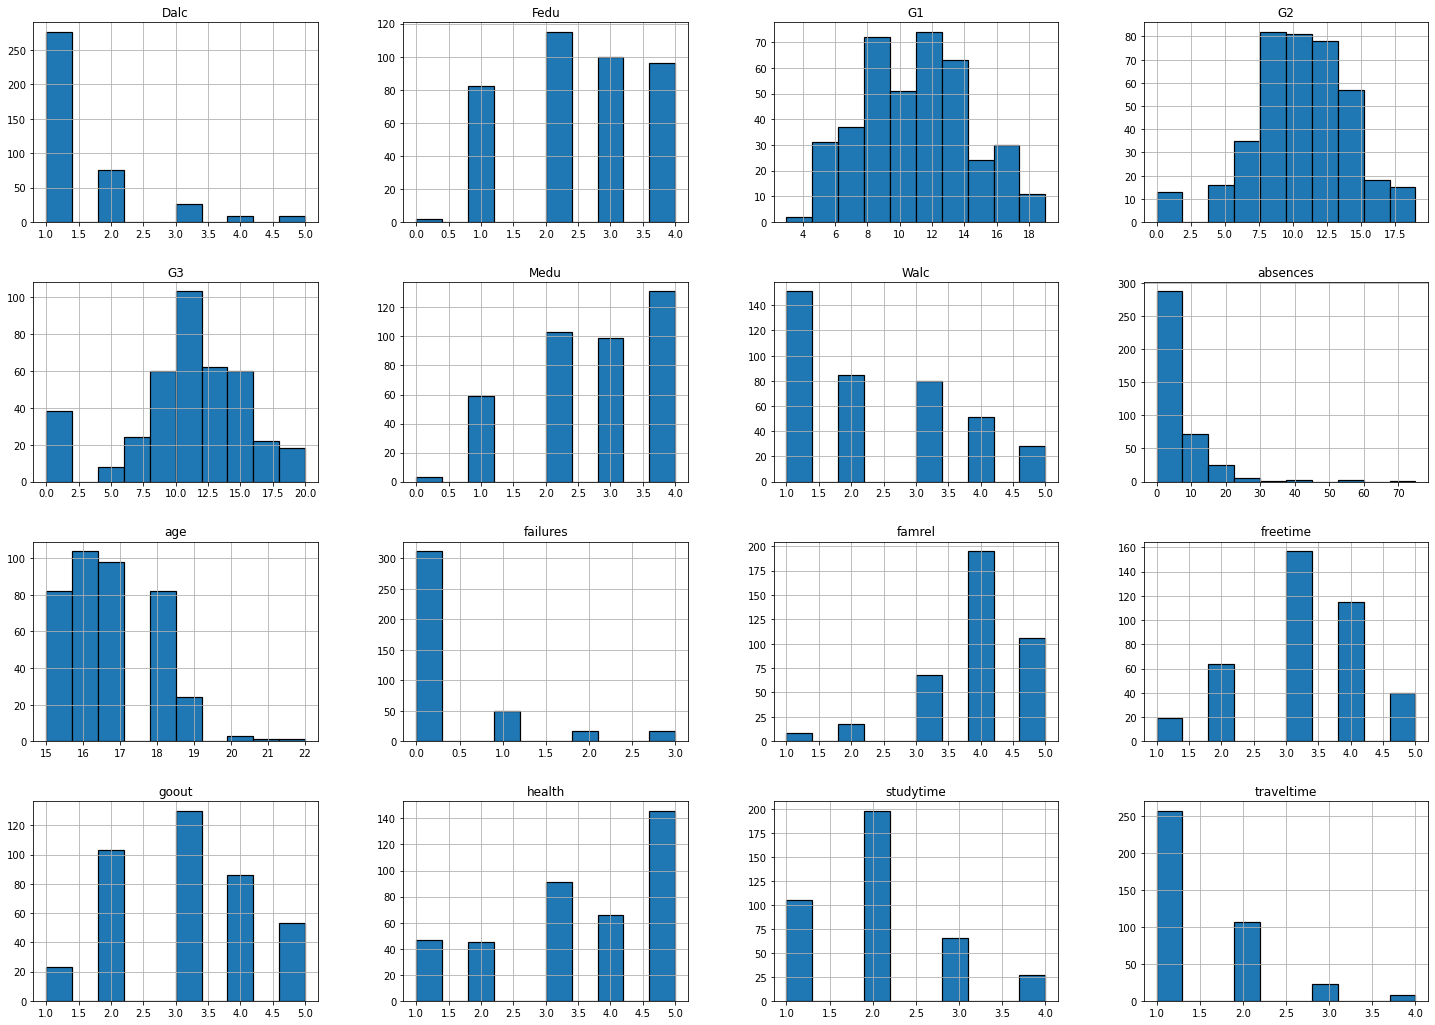

In [4]:
# data.drop('school', 'reason', 'guardian', 'nursery', 'schoolsup')

data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25, 18)
plt.show

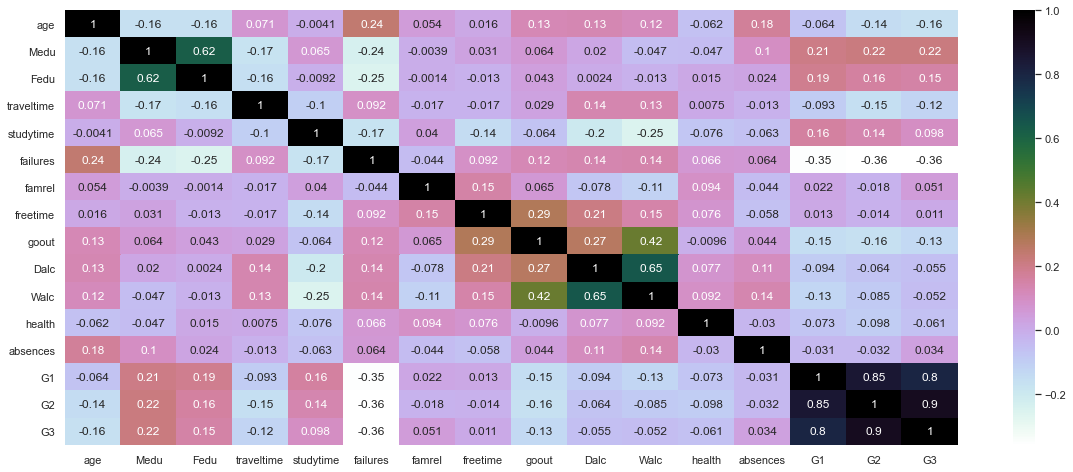

In [5]:
import seaborn as sns
sns.set()

plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [6]:
data = data.drop(['school', 'nursery', 'guardian', 'reason', 'schoolsup'], axis=1)
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,2,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,1,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,1,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,1,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,1,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data_categorical = []
for column in data.columns:
  if data[column].dtype == 'object':
    data_categorical.append(column)

print(data_categorical)


['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']


In [8]:
data_with_dummies = pd.get_dummies(data[data_categorical], drop_first=True)
data_with_dummies.head()

,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0
2,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
3,0,1,0,1,1,0,0,0,0,0,1,0,1,1,1,1,1,1
4,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0


In [9]:
data_categorized = pd.concat([data.drop(data_categorical, axis=1), data_with_dummies], axis=1)
data_categorized

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,1,0,0,0,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,1,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,0,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,0,1,0,1,1,0,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,0,0,1,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,0,1,0,0,0,0,0,1,1,0


In [10]:
x = data_categorized.drop(['G1','G2','G3'], axis=1).values
y1 = data_categorized['G1'].values
y2 = data_categorized['G2'].values
y3 = data_categorized['G3'].values

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)
x_train


array([[16,  3,  3, ...,  1,  1,  1],
       [16,  2,  3, ...,  1,  1,  0],
       [16,  1,  3, ...,  1,  1,  1],
       ...,
       [19,  3,  3, ...,  1,  1,  0],
       [17,  4,  3, ...,  1,  1,  1],
       [15,  4,  4, ...,  1,  1,  0]], dtype=int64)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

lin_reg.fit(x_train, y_train)
predicted_values = lin_reg.predict(x_test)

squared_error = mse(y_test, predicted_values)
print(squared_error)

absolute_error = mae(y_test, predicted_values)
print(absolute_error)

complete_error = np.sqrt((y_test-predicted_values)**2)

11.306664654464916
2.8713849807116434


In [14]:
check = pd.DataFrame({'predicted':predicted_values, 'actual': y_test, 'error':complete_error})
check.head(79)

,predicted,actual,error
0,5.214790,8,2.785210
1,9.049175,14,4.950825
2,10.468817,3,7.468817
3,10.228727,8,2.228727
4,9.644527,9,0.644527
...,...,...,...
74,10.730825,12,1.269175
75,10.840238,7,3.840238
76,13.996480,9,4.996480
77,12.336152,15,2.663848


In [15]:
lin_reg.score(x_test, y_test)

0.17305472614592987

In [16]:
from sklearn

SyntaxError: invalid syntax (<ipython-input-16-9bacd0769f04>, line 1)